In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, ExtraTreesClassifier, BaggingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc
import pickle
import random
import pickle

In [2]:
# Load the updated datasets
employee_file = "/content/JobsDataset_Updated_Experience.csv"
stock_file = "/content/stock_data_100_rows_unique_companies.csv"

In [3]:
df_employee = pd.read_csv(employee_file)
df_stock = pd.read_csv(stock_file)

In [4]:
print("Employee Dataset Sample:")
df_employee

Employee Dataset Sample:


,Experience,Company Name,ID,Query,Job Title,Description,IT Skills,Soft Skills,Education,Token Usage,Employee Name,Age,Gender,Country
0,21,HyperVision,4162,Deep Learning,Deep Learning Engineer,Who we are: Our mission is to provide tools th...,"Deep learning algorithms, User modeling, Topic...","Design and code reviews, Working with large un...",NaN,510,Karen Steele,43,Female,Brazil
1,31,DataSync Technologies,5349,Data Quality Manager,Clinical Data Manager,The Clinical Data Manager is a member of the p...,"Data management, Clinical data review, Data au...","Communication, Collaboration, Problem-solving,...","Education-related:, BA/BS degree in biological...",662,Tammy Jefferson,53,Male,Australia
2,3,BigData Labs,4038,Deep Learning,"Sales Consultant, Home Theater, Appliances, Ga...",What does a Best Buy Sales Consultant in Home ...,"Selling skills, Customer service, Merchandising","Teamwork, Flexibility, Communication, Relation...","Both Education and Experience:, Continuous lea...",653,Daniel Hall,25,Female,Brazil
3,2,SkyCompute,2603,Business Analyst,"Business Services Analyst, HRPP",The HRPP Business Analyst reports dually to th...,"Financial administration, Budget development, ...","Independent judgment, Critical thinking, Commu...","Skills Related to Education:, Research ethics",732,Amber Hernandez,24,Female,India
4,15,AI Spectrum,3371,Machine Learning,Quantitative Analyst,Position Description: The Analytics Research a...,"Research mindset, Advanced econometrics, Stati...",Ability to quickly adapt to changing business ...,"Education Related:, Master's degree in quantit...",810,Nathan Obrien,37,Female,Brazil
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,17,AI Horizons,1051,Data Architect,Software and Data Pipeline Architect,About the role: As a Software and Data Pipelin...,"Python, Ruby, PostgreSQL, ElasticSearch, Redsh...","Passionate, Experienced, Team player, Mentoring","Education-related Skills:, Multiple years of e...",661,John Walker,39,Male,South Africa
496,2,Visionary Networks,7841,Cloud Architect,Enterprise Cloud Sales rep,"Overview Founded in 1951, Iron Mountain Incorp...","Cloud Computing, Infrastructure solutions (Ser...","Business savvy, Self-starter, Strong communica...",NaN,1092,Roy Sparks,24,Female,France
497,20,QuantumByte,7289,IT Systems Administrator,Systems Administrator - LINUX,"Casa Systems, Inc. is a leading provider of ne...","Linux administration, Red Hat Enterprise/Cento...","Team player, Good documentation skills","Related to Education:, Undergraduate degree or...",654,Tara Wallace,42,Female,Canada
498,33,VisionX Technologies,4444,Business Intelligence Analyst,Senior Business Intelligence Engineer,Summary Responsible for the foundation’s overa...,Business Intelligence (BI) Platform Management...,"Collaboration, Mentorship, Leadership, Communi...","Related to Education:, Bachelor's Degree in En...",1238,Amber Brown,55,Male,USA


In [5]:
print("Employee Dataset Sample:")
df_employee

Employee Dataset Sample:


,Experience,Company Name,ID,Query,Job Title,Description,IT Skills,Soft Skills,Education,Token Usage,Employee Name,Age,Gender,Country
0,21,HyperVision,4162,Deep Learning,Deep Learning Engineer,Who we are: Our mission is to provide tools th...,"Deep learning algorithms, User modeling, Topic...","Design and code reviews, Working with large un...",NaN,510,Karen Steele,43,Female,Brazil
1,31,DataSync Technologies,5349,Data Quality Manager,Clinical Data Manager,The Clinical Data Manager is a member of the p...,"Data management, Clinical data review, Data au...","Communication, Collaboration, Problem-solving,...","Education-related:, BA/BS degree in biological...",662,Tammy Jefferson,53,Male,Australia
2,3,BigData Labs,4038,Deep Learning,"Sales Consultant, Home Theater, Appliances, Ga...",What does a Best Buy Sales Consultant in Home ...,"Selling skills, Customer service, Merchandising","Teamwork, Flexibility, Communication, Relation...","Both Education and Experience:, Continuous lea...",653,Daniel Hall,25,Female,Brazil
3,2,SkyCompute,2603,Business Analyst,"Business Services Analyst, HRPP",The HRPP Business Analyst reports dually to th...,"Financial administration, Budget development, ...","Independent judgment, Critical thinking, Commu...","Skills Related to Education:, Research ethics",732,Amber Hernandez,24,Female,India
4,15,AI Spectrum,3371,Machine Learning,Quantitative Analyst,Position Description: The Analytics Research a...,"Research mindset, Advanced econometrics, Stati...",Ability to quickly adapt to changing business ...,"Education Related:, Master's degree in quantit...",810,Nathan Obrien,37,Female,Brazil
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,17,AI Horizons,1051,Data Architect,Software and Data Pipeline Architect,About the role: As a Software and Data Pipelin...,"Python, Ruby, PostgreSQL, ElasticSearch, Redsh...","Passionate, Experienced, Team player, Mentoring","Education-related Skills:, Multiple years of e...",661,John Walker,39,Male,South Africa
496,2,Visionary Networks,7841,Cloud Architect,Enterprise Cloud Sales rep,"Overview Founded in 1951, Iron Mountain Incorp...","Cloud Computing, Infrastructure solutions (Ser...","Business savvy, Self-starter, Strong communica...",NaN,1092,Roy Sparks,24,Female,France
497,20,QuantumByte,7289,IT Systems Administrator,Systems Administrator - LINUX,"Casa Systems, Inc. is a leading provider of ne...","Linux administration, Red Hat Enterprise/Cento...","Team player, Good documentation skills","Related to Education:, Undergraduate degree or...",654,Tara Wallace,42,Female,Canada
498,33,VisionX Technologies,4444,Business Intelligence Analyst,Senior Business Intelligence Engineer,Summary Responsible for the foundation’s overa...,Business Intelligence (BI) Platform Management...,"Collaboration, Mentorship, Leadership, Communi...","Related to Education:, Bachelor's Degree in En...",1238,Amber Brown,55,Male,USA


In [6]:
# Data Cleaning and Preprocessing - Employee Data
print("\nCleaning and Preprocessing Employee Data...")
# Fill missing values
for col in df_employee.columns:
    df_employee[col].fillna(df_employee[col].mode()[0], inplace=True)


Cleaning and Preprocessing Employee Data...


<ipython-input-6-cd89ae1b5c90>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_employee[col].fillna(df_employee[col].mode()[0], inplace=True)
<ipython-input-6-cd89ae1b5c90>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=T

In [7]:
# Encode categorical features
le = LabelEncoder()
categorical_columns = ['Gender', 'Education', 'IT Skills', 'Soft Skills', 'Country']
for col in categorical_columns:
    df_employee[col] = le.fit_transform(df_employee[col])

In [8]:
# Add 'Layoff' column with random values
np.random.seed(42)
df_employee['Layoff'] = np.random.choice([0, 1], size=len(df_employee), p=[0.7, 0.3])

In [9]:
# Data Cleaning and Preprocessing - Stock Data
print("\nCleaning and Preprocessing Stock Data...")
# Convert date column in stock data
if 'Date' in df_stock.columns:
    df_stock['Date'] = pd.to_datetime(df_stock['Date'])
    df_stock.set_index('Date', inplace=True)


Cleaning and Preprocessing Stock Data...


In [10]:
# Merge stock market trends with employee data (assume latest available stock price per employee)
df_employee['Stock Index'] = df_stock['Close'].iloc[-1]

In [11]:
# Define features and labels
y = df_employee['Layoff']
X = df_employee.drop(columns=['Layoff', 'Employee Name'])

In [12]:
# Identify non-numeric columns
non_numeric_cols = X.select_dtypes(include=['object']).columns.tolist()

In [13]:
# Encode categorical variables using Label Encoding
label_encoders = {}
for col in non_numeric_cols:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])
    label_encoders[col] = le

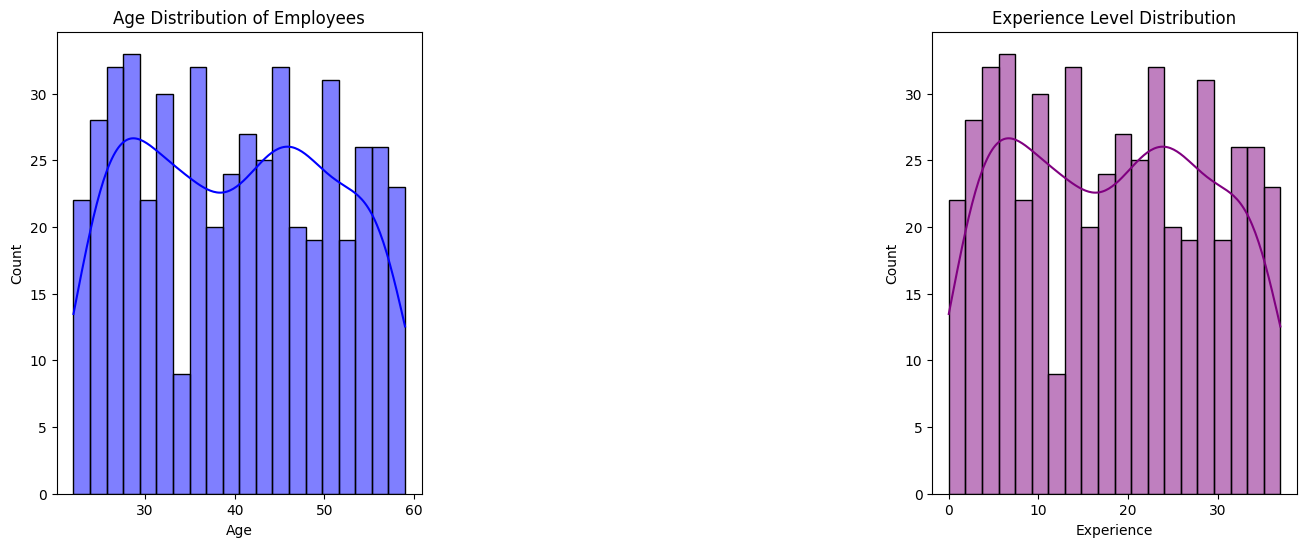

In [14]:
# EDA Function
def plot_eda():
    plt.figure(figsize=(16, 6))
    plt.subplot(1, 3, 1)
    sns.histplot(df_employee['Age'], bins=20, kde=True, color='blue')
    plt.title('Age Distribution of Employees')

    plt.subplot(1, 3, 3)
    sns.histplot(df_employee['Experience'], bins=20, kde=True, color='purple')
    plt.title('Experience Level Distribution')

    plt.show()

plot_eda()


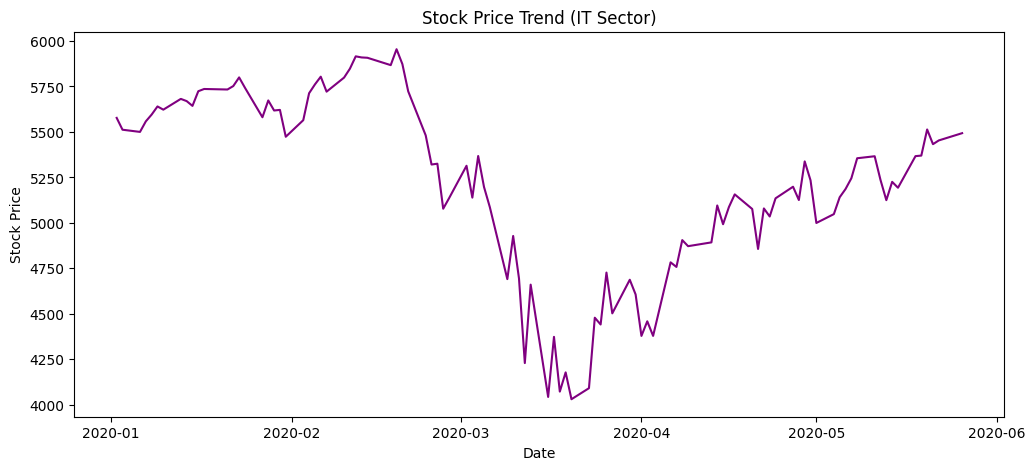

In [15]:
# Visualizing Stock Data
def plot_stock_data():
    plt.figure(figsize=(12, 5))
    plt.plot(df_stock['Close'], color='purple')
    plt.title('Stock Price Trend (IT Sector)')
    plt.xlabel('Date')
    plt.ylabel('Stock Price')
    plt.show()

plot_stock_data()

In [16]:
# Standardize numerical data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [17]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [18]:
models = {
    "Random Forest": RandomForestClassifier(n_estimators=200, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=200, random_state=42),
    "AdaBoost": AdaBoostClassifier(n_estimators=200, random_state=42),
    "Extra Trees": ExtraTreesClassifier(n_estimators=200, random_state=42),
    "Logistic Regression": LogisticRegression(),
    "Support Vector Machine": SVC(probability=True),
    "Decision Tree": DecisionTreeClassifier(),
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=5),
    "Bagging Classifier": BaggingClassifier(n_estimators=200, random_state=42)
}

In [19]:
# Train and evaluate models
model_results = {}
plt.figure(figsize=(12, 8))

for i, (name, model) in enumerate(models.items()):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    model_results[name] = accuracy_score(y_test, y_pred)

<Figure size 1200x800 with 0 Axes>

In [20]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
results= {}

In [21]:
for name, model in models.items():
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    results[name] = {"Confusion Matrix": cm}  # Store properly


Random Forest Confusion Matrix:
[[66  6]
 [25  3]]

Gradient Boosting Confusion Matrix:
[[65  7]
 [25  3]]

AdaBoost Confusion Matrix:
[[60 12]
 [22  6]]

Extra Trees Confusion Matrix:
[[68  4]
 [24  4]]

Logistic Regression Confusion Matrix:
[[71  1]
 [27  1]]

Support Vector Machine Confusion Matrix:
[[71  1]
 [28  0]]

Decision Tree Confusion Matrix:
[[48 24]
 [22  6]]

K-Nearest Neighbors Confusion Matrix:
[[57 15]
 [21  7]]

Bagging Classifier Confusion Matrix:
[[63  9]
 [24  4]]


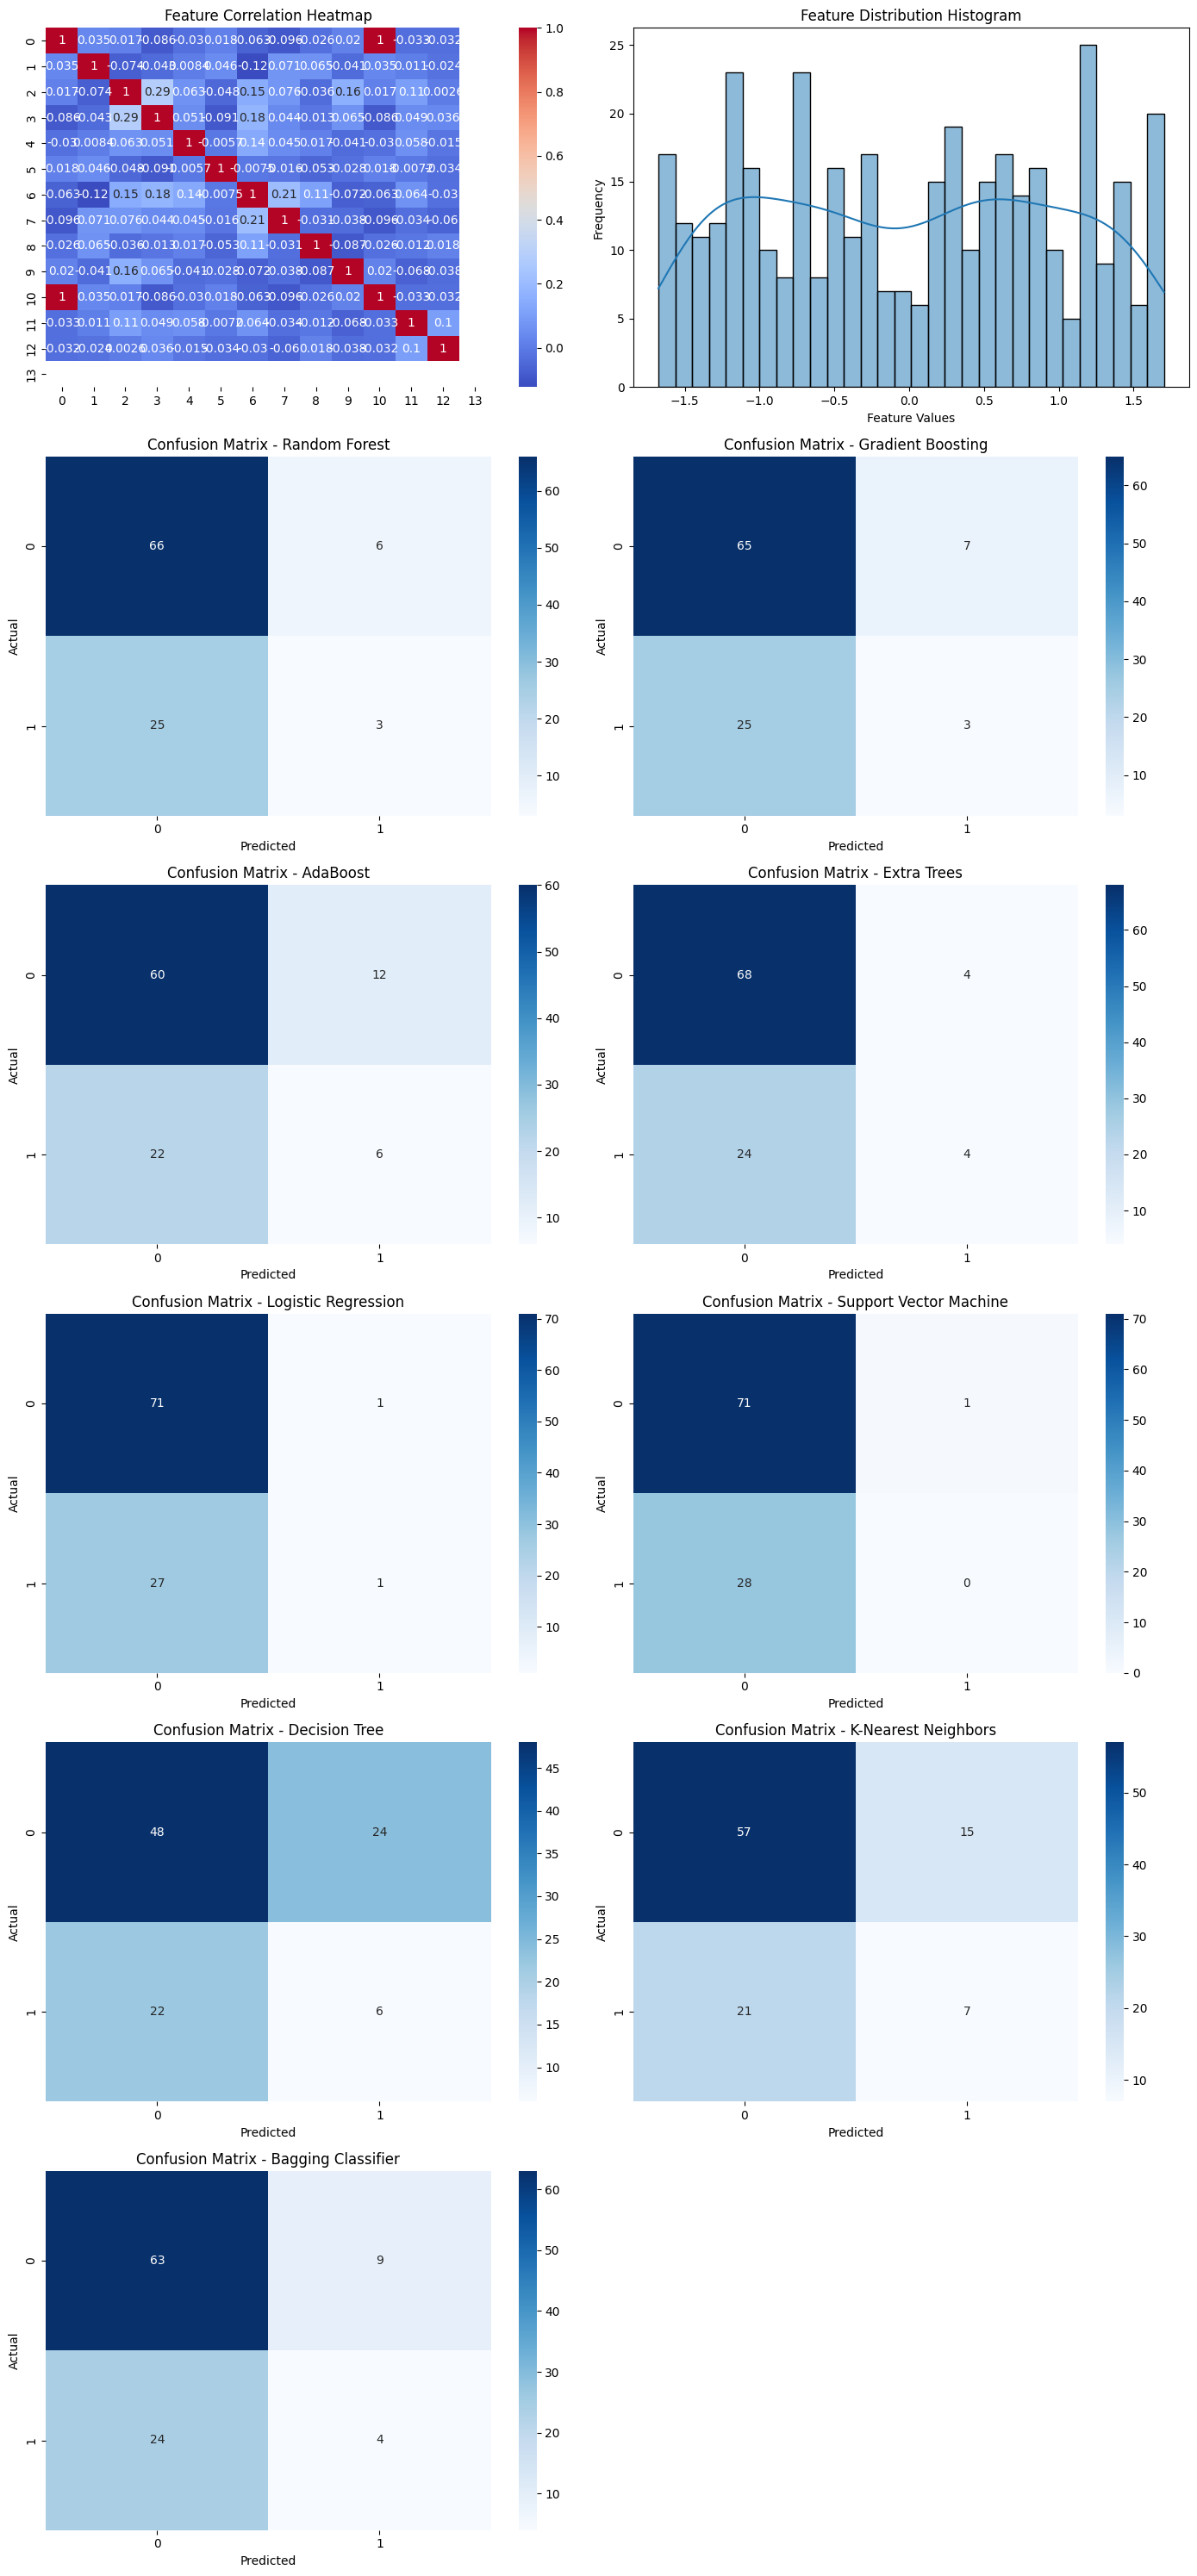

In [22]:
def plot_results():
    num_models = len(results)
    has_proba_model = any(hasattr(model, "predict_proba") for model in models.values())

    total_plots = num_models + (1 if has_proba_model else 0) + 2  # +2 for heatmap and histogram
    rows = (total_plots // 2) + (total_plots % 2)  # Ensure all plots fit
    cols = 2

    fig, axes = plt.subplots(rows, cols, figsize=(7 * cols, 5 * rows))
    axes = axes.flatten()

    plot_index = 0

    # Feature Correlation Heatmap
    sns.heatmap(pd.DataFrame(X_train_scaled).corr(), annot=True, cmap='coolwarm', ax=axes[plot_index])
    axes[plot_index].set_title('Feature Correlation Heatmap')
    plot_index += 1

    # Histogram of first feature
    sns.histplot(pd.DataFrame(X_train_scaled).iloc[:, 0], bins=30, kde=True, ax=axes[plot_index])
    axes[plot_index].set_title('Feature Distribution Histogram')
    axes[plot_index].set_xlabel('Feature Values')
    axes[plot_index].set_ylabel('Frequency')
    plot_index += 1

    # Debugging: Print Confusion Matrices
    for name, res in results.items():
        print(f"\n{name} Confusion Matrix:\n{res['Confusion Matrix']}")

    # Confusion Matrices
    for name, res in results.items():
        if plot_index < len(axes):
            if res["Confusion Matrix"] is not None:  # Ensure it's valid
                sns.heatmap(res["Confusion Matrix"], annot=True, fmt='d', cmap='Blues', ax=axes[plot_index])
                axes[plot_index].set_xlabel('Predicted')
                axes[plot_index].set_ylabel('Actual')
                axes[plot_index].set_title(f'Confusion Matrix - {name}')
                plot_index += 1
            else:
                print(f"Skipping {name}, Confusion Matrix is None!")


    # Hide empty subplots if any
    for i in range(plot_index, len(axes)):
        fig.delaxes(axes[i])

    plt.tight_layout()
    plt.show()

plot_results()


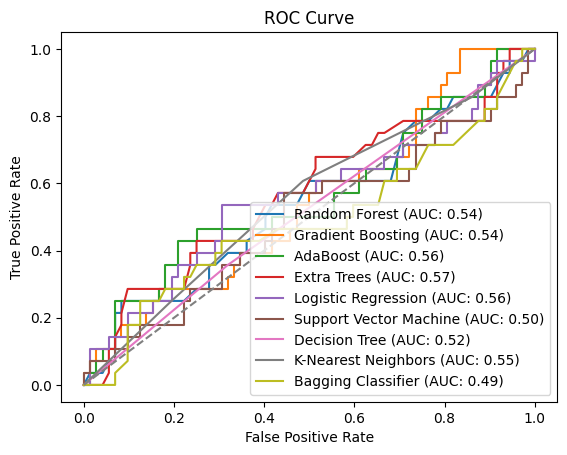

In [23]:
for name, model in models.items():
    if hasattr(model, "predict_proba"):
        fpr, tpr, _ = roc_curve(y_test, model.predict_proba(X_test_scaled)[:, 1])
        plt.plot(fpr, tpr, label=f'{name} (AUC: {auc(fpr, tpr):.2f})')

plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()



In [26]:
for name, res in results.items():
    cm = res['Confusion Matrix']  # Get the confusion matrix
    cm = np.array(cm)  # Ensure it's a NumPy array

    # Accuracy formula: (TP + TN) / (TP + TN + FP + FN)
    accuracy = (cm[0, 0] + cm[1, 1]) / cm.sum()

    print(f"{name} Model Accuracy: {accuracy:.4f}")

Random Forest Model Accuracy: 0.6900
Gradient Boosting Model Accuracy: 0.6800
AdaBoost Model Accuracy: 0.6600
Extra Trees Model Accuracy: 0.7200
Logistic Regression Model Accuracy: 0.7200
Support Vector Machine Model Accuracy: 0.7100
Decision Tree Model Accuracy: 0.5400
K-Nearest Neighbors Model Accuracy: 0.6400
Bagging Classifier Model Accuracy: 0.6700


In [29]:
for name, res in results.items():
    cm = res['Confusion Matrix']  # Get the confusion matrix
    cm = np.array(cm)  # Ensure it's a NumPy array

    # Accuracy formula: (TP + TN) / (TP + TN + FP + FN)
    accuracy = (cm[0, 0] + cm[1, 1]) / cm.sum()

    # Store accuracy in the results dictionary
    results[name]['Accuracy'] = accuracy

    print(f"{name} Model Accuracy: {accuracy:.4f}")

Random Forest Model Accuracy: 0.6900
Gradient Boosting Model Accuracy: 0.6800
AdaBoost Model Accuracy: 0.6600
Extra Trees Model Accuracy: 0.7200
Logistic Regression Model Accuracy: 0.7200
Support Vector Machine Model Accuracy: 0.7100
Decision Tree Model Accuracy: 0.5400
K-Nearest Neighbors Model Accuracy: 0.6400
Bagging Classifier Model Accuracy: 0.6700


In [30]:
for name, res in results.items():
    print(f"Available keys for {name}: {res.keys()}")

# Print accuracies for all models
for name, res in results.items():
    print(f"{name} Model Accuracy: {res['Accuracy']:.4f}")

Available keys for Random Forest: dict_keys(['Confusion Matrix', 'Accuracy'])
Available keys for Gradient Boosting: dict_keys(['Confusion Matrix', 'Accuracy'])
Available keys for AdaBoost: dict_keys(['Confusion Matrix', 'Accuracy'])
Available keys for Extra Trees: dict_keys(['Confusion Matrix', 'Accuracy'])
Available keys for Logistic Regression: dict_keys(['Confusion Matrix', 'Accuracy'])
Available keys for Support Vector Machine: dict_keys(['Confusion Matrix', 'Accuracy'])
Available keys for Decision Tree: dict_keys(['Confusion Matrix', 'Accuracy'])
Available keys for K-Nearest Neighbors: dict_keys(['Confusion Matrix', 'Accuracy'])
Available keys for Bagging Classifier: dict_keys(['Confusion Matrix', 'Accuracy'])
Random Forest Model Accuracy: 0.6900
Gradient Boosting Model Accuracy: 0.6800
AdaBoost Model Accuracy: 0.6600
Extra Trees Model Accuracy: 0.7200
Logistic Regression Model Accuracy: 0.7200
Support Vector Machine Model Accuracy: 0.7100
Decision Tree Model Accuracy: 0.5400
K-Ne

In [31]:
# Save models
for name, model in models.items():
    with open(f'layoff_{name.lower().replace(" ", "_")}_model.pkl', 'wb') as f:
        pickle.dump(model, f)

In [32]:
# Train and evaluate models
model_results = {}
final_predictions = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    model_results[name] = accuracy_score(y_test, y_pred)
    final_predictions[name] = y_pred

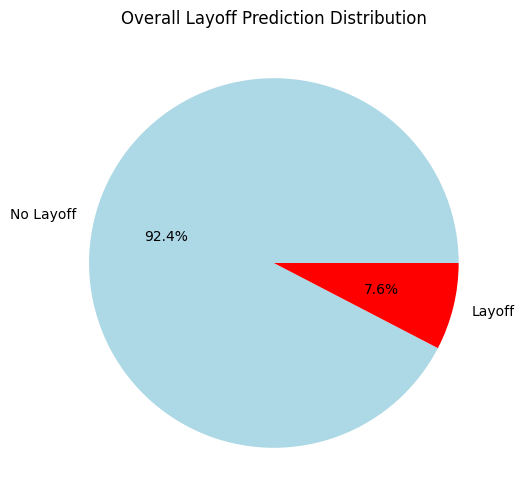

In [33]:
# Pie chart for overall layoff predictions
overall_layoff = np.mean(list(final_predictions.values()), axis=0)
predicted_counts = {"No Layoff": np.sum(overall_layoff < 0.6), "Layoff": np.sum(overall_layoff >= 0.4)}

plt.figure(figsize=(6, 6))
plt.pie(predicted_counts.values(), labels=predicted_counts.keys(), autopct='%1.1f%%', colors=['lightblue', 'red'])
plt.title("Overall Layoff Prediction Distribution")
plt.show()

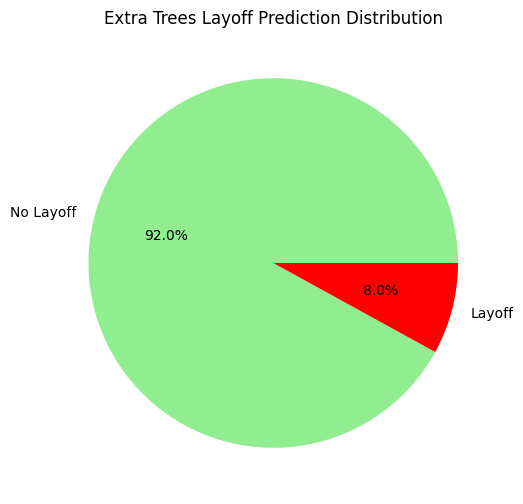

In [34]:
# Pie chart for the best performing model
best_model = max(model_results, key=model_results.get)
best_predictions = final_predictions[best_model]
predicted_counts_best = {"No Layoff": np.sum(best_predictions == 0), "Layoff": np.sum(best_predictions == 1)}

plt.figure(figsize=(6, 6))
plt.pie(predicted_counts_best.values(), labels=predicted_counts_best.keys(), autopct='%1.1f%%', colors=['lightgreen', 'red'])
plt.title(f"{best_model} Layoff Prediction Distribution")
plt.show()